In [1]:
from __future__ import annotations

import numpy as np

embeddings_avg_mptrj = np.load(
    "/mnt/shared/jmp-wbm-embeddings-omat/mptrj/embeddings_avg.npy"
)
labels_mptrj = np.load("/mnt/shared/jmp-wbm-embeddings-omat/mptrj/labels.npy")

embeddings_avg_wbm = np.load(
    "/mnt/shared/jmp-wbm-embeddings-omat/wbm/embeddings_avg.npy"
)
labels_wbm = np.load("/mnt/shared/jmp-wbm-embeddings-omat/wbm/labels.npy")

print(embeddings_avg_mptrj.shape, labels_mptrj.shape)
print(embeddings_avg_wbm.shape, labels_wbm.shape)

(10000, 256) (10000, 1)
(10000, 256) (10000, 1)


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

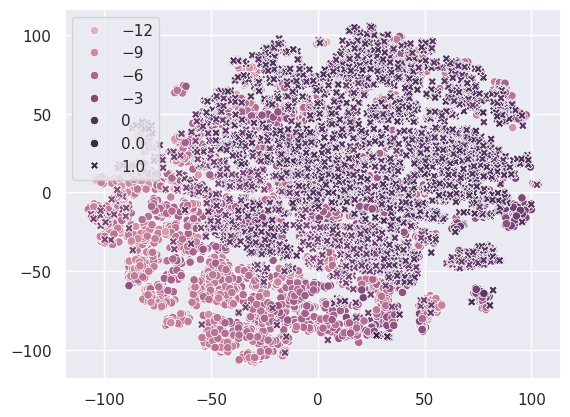

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

sns.set_theme()

# Perform t-SNE on all embeddings
all_embeddings = np.concatenate([embeddings_avg_mptrj, embeddings_avg_wbm], axis=0)
all_labels = np.concatenate([labels_mptrj, labels_wbm], axis=0)
all_datasets = np.concatenate(
    [np.zeros_like(labels_mptrj), np.ones_like(labels_wbm)], axis=0
)

tsne = TSNE(n_components=2, random_state=0)
all_embeddings_tsne = tsne.fit_transform(all_embeddings)


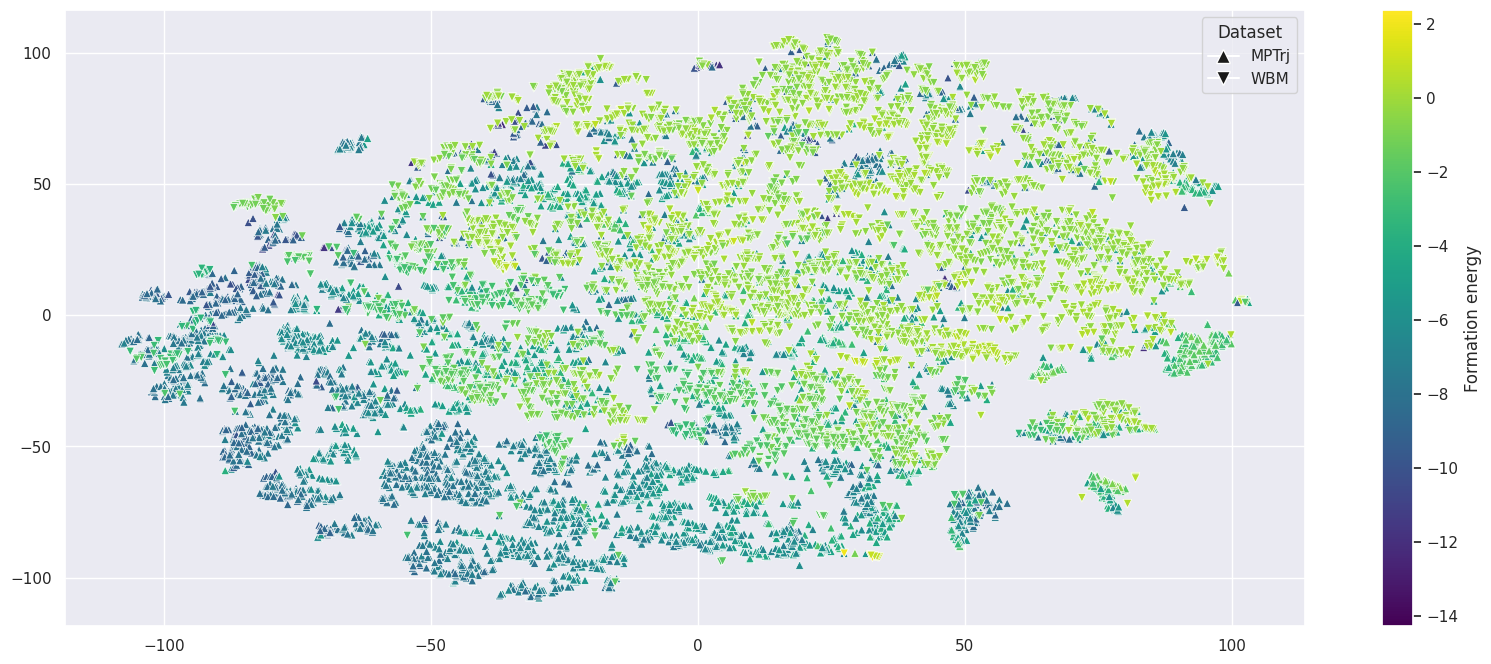

In [38]:
markers = ["^", "v"]

# Plot t-SNE of all embeddings,
# Colored by the labels (formation energy) and hatch = dataset (mptrj or wbm)
fig, ax = plt.subplots(figsize=(20, 8))
scatter = sns.scatterplot(
    x=all_embeddings_tsne[:, 0],
    y=all_embeddings_tsne[:, 1],
    hue=all_labels.flatten(),
    style=all_datasets.flatten(),
    markers=markers,
    palette="viridis",
    ax=ax,
    legend=False,
)

# Create a colorbar
norm = plt.Normalize(all_labels.min(), all_labels.max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("Formation energy")

# Add legend for markers
handles, labels = scatter.get_legend_handles_labels()
dataset_labels = ["MPTrj", "WBM"]
for i, label in enumerate(dataset_labels):
    handles.append(
        plt.Line2D(
            [0],
            [0],
            marker=markers[i],
            color="w",
            markerfacecolor="k",
            markersize=10,
        )
    )
    labels.append(label)
ax.legend(handles, labels, title="Dataset")

plt.show()